In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv("Amazon Sales data.csv")
df.columns = df.columns.str.strip()
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
df.shape

(100, 14)

In [4]:
df.Country.nunique()

76

In [5]:
#df.City.unique()

In [6]:
df.Region.nunique()

7

In [7]:
#rename the some column names 
df.rename({'Item Type': 'Item_Type', 'Sales Channel': 'Sales_Channel','Order Priority': 'Order_Priority','Order Date': 'Order_Date','Order ID': 'Order_ID','Ship Date':'Ship_Date','Units Sold':'Units_Sold','Unit Price':'Unit_Price','Unit Cost':'Unit_Cost','Order Date':'Order_Date','Total Revenue':'Total_Revenue','Total Cost':'Total_Cost','Total Profit':'Total_Profit'}, axis=1, inplace=True)
df.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [8]:
df.Region.unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [9]:
df.Item_Type.nunique()
df.Item_Type.unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item_Type       100 non-null    object 
 3   Sales_Channel   100 non-null    object 
 4   Order_Priority  100 non-null    object 
 5   Order_Date      100 non-null    object 
 6   Order_ID        100 non-null    int64  
 7   Ship_Date       100 non-null    object 
 8   Units_Sold      100 non-null    int64  
 9   Unit_Price      100 non-null    float64
 10  Unit_Cost       100 non-null    float64
 11  Total_Revenue   100 non-null    float64
 12  Total_Cost      100 non-null    float64
 13  Total_Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [11]:
df.columns

Index(['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority',
       'Order_Date', 'Order_ID', 'Ship_Date', 'Units_Sold', 'Unit_Price',
       'Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit'],
      dtype='object')

In [12]:
Categorical_col = ['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority']
Numerical_col = ['Units_Sold', 'Unit_Price','Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit']

In [13]:
#Remove outliers from numerical variables
z_scores = stats.zscore(df[Numerical_col])
threshold = 10 
outliers = (z_scores > threshold) | (z_scores < -threshold)
Cleaned_data_num = df[~outliers.any(axis=1)]

In [14]:
#Remove outliers from dqtaset 
Cleaned_data_categorical = df[Categorical_col]
#combined cleaned data
Cleaned_data = pd.concat([Cleaned_data_num,Cleaned_data_categorical], axis=1)

In [15]:
# getting variables that only have numerical values
#df2 = df.convert_dtypes().select_dtypes("number")
#df2

### Boxplot After removing the outliers

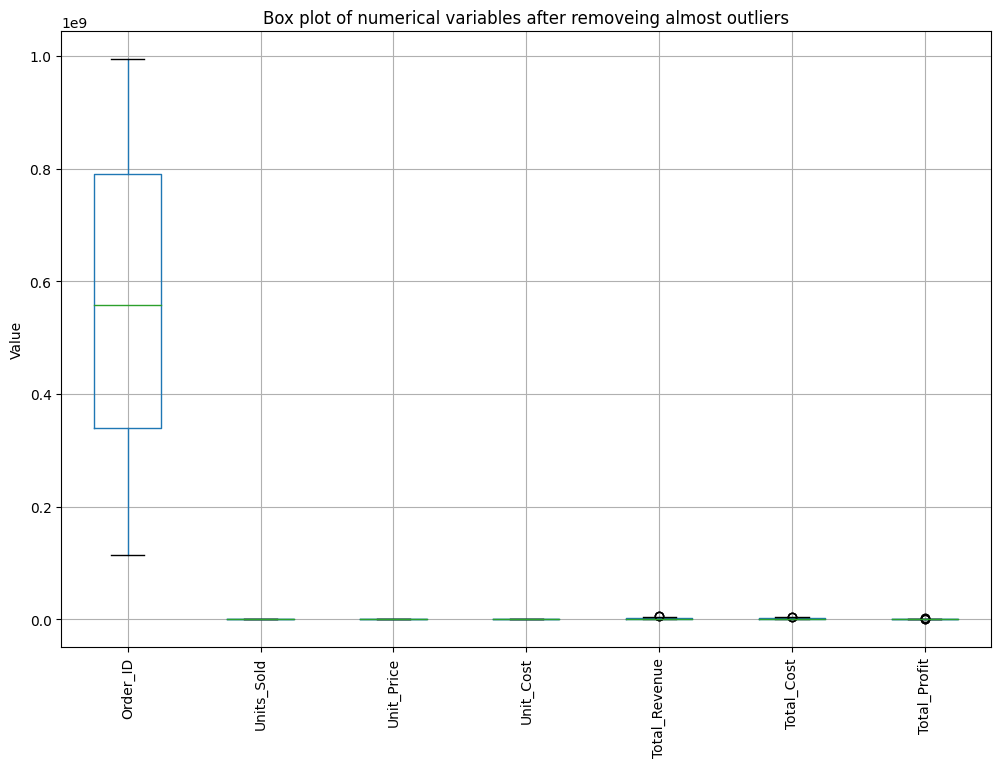

In [16]:
plt.figure(figsize=(12,8))
Cleaned_data.boxplot()
plt.title("Box plot of numerical variables after removeing almost outliers")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Visualizing the Distribution

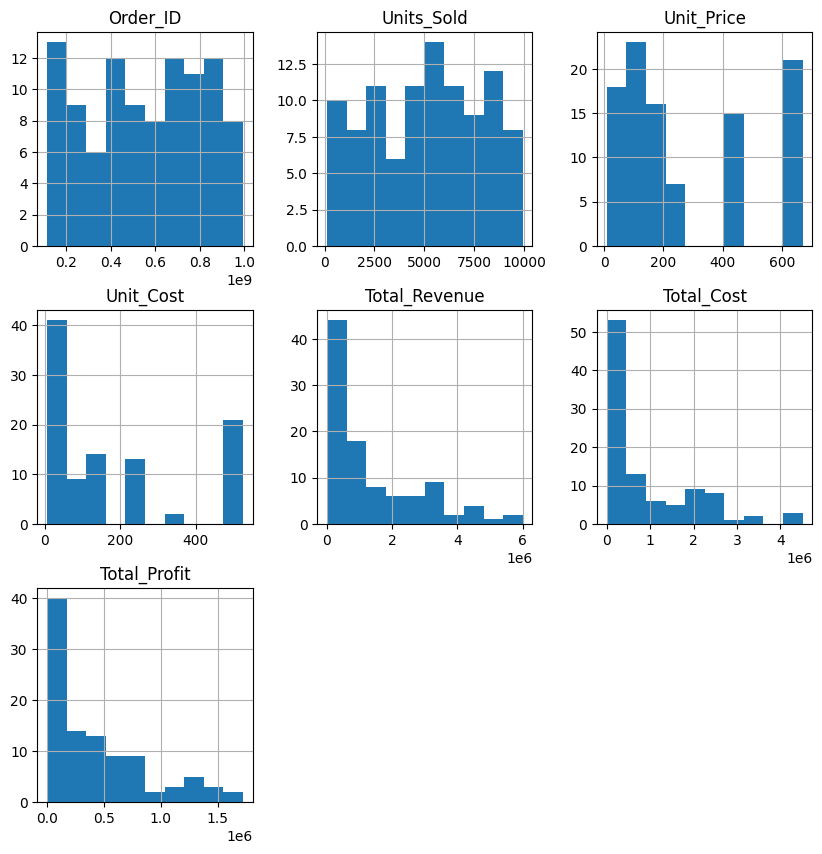

In [17]:
Cleaned_data.hist(figsize=(10,10))
plt.show()

In [18]:
data_ofsales = Cleaned_data[['Order_Date','Units_Sold','Total_Profit']].copy()
data_ofsales

,Order_Date,Units_Sold,Total_Profit
0,5/28/2010,9925,951410.50
1,8/22/2012,2804,248406.36
2,5/2/2014,1779,224598.75
3,6/20/2014,8102,19525.82
4,2/1/2013,5062,639077.50
...,...,...,...
95,7/26/2011,888,65214.72
96,11/11/2011,6267,15103.47
97,6/1/2016,1485,93748.05
98,7/30/2015,5767,144521.02


In [19]:
#data col is formatted as datetime
data_ofsales['Order_Date'] = pd.to_datetime(data_ofsales['Order_Date'])
#set the data col as index
data_ofsales.set_index('Order_Date', inplace=True)

#Resample data to yearly frequency and aggregate using sum
yearly_sales = data_ofsales.resample('Y').sum()
yearly_sales


,Units_Sold,Total_Profit
Order_Date,,
2010-12-31,61571,6629567.43
2011-12-31,54768,2741008.23
2012-12-31,97967,9213010.12
2013-12-31,64663,6715420.04
2014-12-31,92040,5879461.68
2015-12-31,49480,3996539.44
2016-12-31,43156,4903838.01
2017-12-31,49226,4089353.45


In [20]:
Monthly_sales = data_ofsales.resample('M').sum()
Monthly_sales

,Units_Sold,Total_Profit
Order_Date,,
2010-02-28,9503,1424410.94
2010-03-31,0,0.00
2010-04-30,0,0.00
2010-05-31,15747,965441.52
2010-06-30,9905,727423.20
...,...,...
2017-01-31,13030,879507.12
2017-02-28,16301,1891271.80
2017-03-31,3015,75555.90


In [21]:
daily_sales = data_ofsales.resample('D').sum()
daily_sales

,Units_Sold,Total_Profit
Order_Date,,
2010-02-02,2269,166635.36
2010-02-03,0,0.00
2010-02-04,0,0.00
2010-02-05,0,0.00
2010-02-06,7234,1257775.58
...,...,...
2017-05-18,0,0.00
2017-05-19,0,0.00
2017-05-20,8656,766835.04


### Yearly Sales and Profit

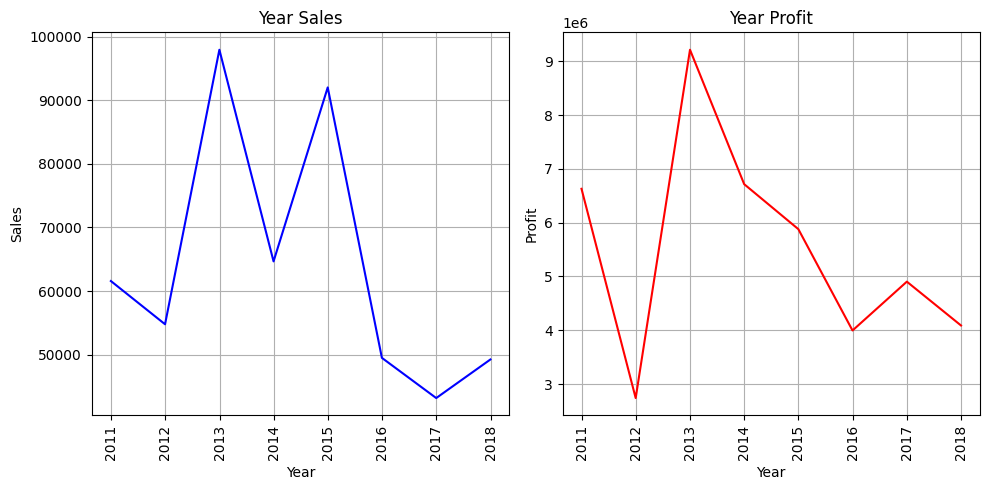

In [22]:
#create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

#plot sales yearly
axes[0].plot(yearly_sales.index, yearly_sales['Units_Sold'],color='blue')
axes[0].set_title("Year Sales")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Sales')
axes[0].grid(True)
axes[0].tick_params(axis='x',rotation=90)

#plot profit yearly
axes[1].plot(yearly_sales.index, yearly_sales['Total_Profit'],color='red')
axes[1].set_title("Year Profit")
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Profit')
axes[1].grid(True)
axes[1].tick_params(axis='x',rotation=90)

plt.tight_layout()
plt.show()

### Monthly Sales and Profit

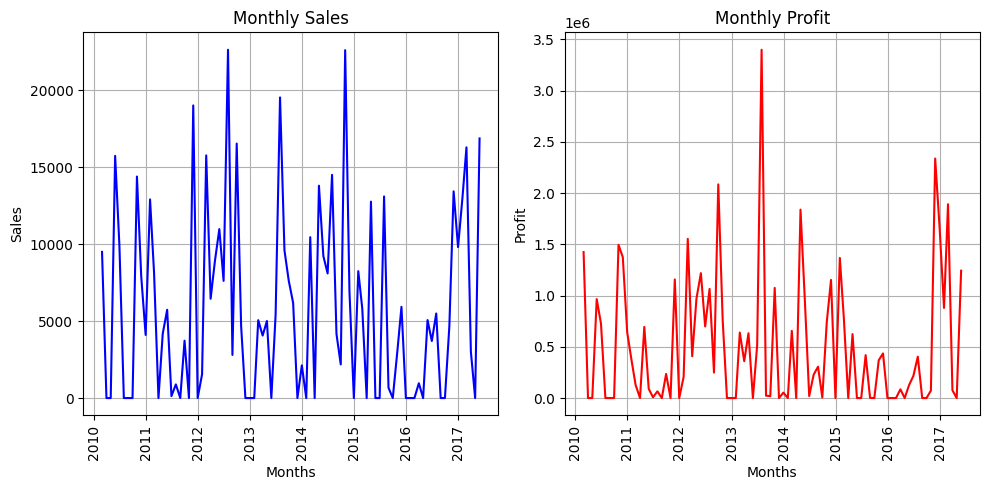

In [23]:
#create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

#plot sales yearly
axes[0].plot(Monthly_sales.index, Monthly_sales['Units_Sold'],color='blue')
axes[0].set_title("Monthly Sales")
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Sales')
axes[0].grid(True)
axes[0].tick_params(axis='x',rotation=90)

#plot profit yearly
axes[1].plot(Monthly_sales.index, Monthly_sales['Total_Profit'],color='red')
axes[1].set_title("Monthly Profit")
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Profit')
axes[1].grid(True)
axes[1].tick_params(axis='x',rotation=90)

plt.tight_layout()
plt.show()

### Daily sales and profit

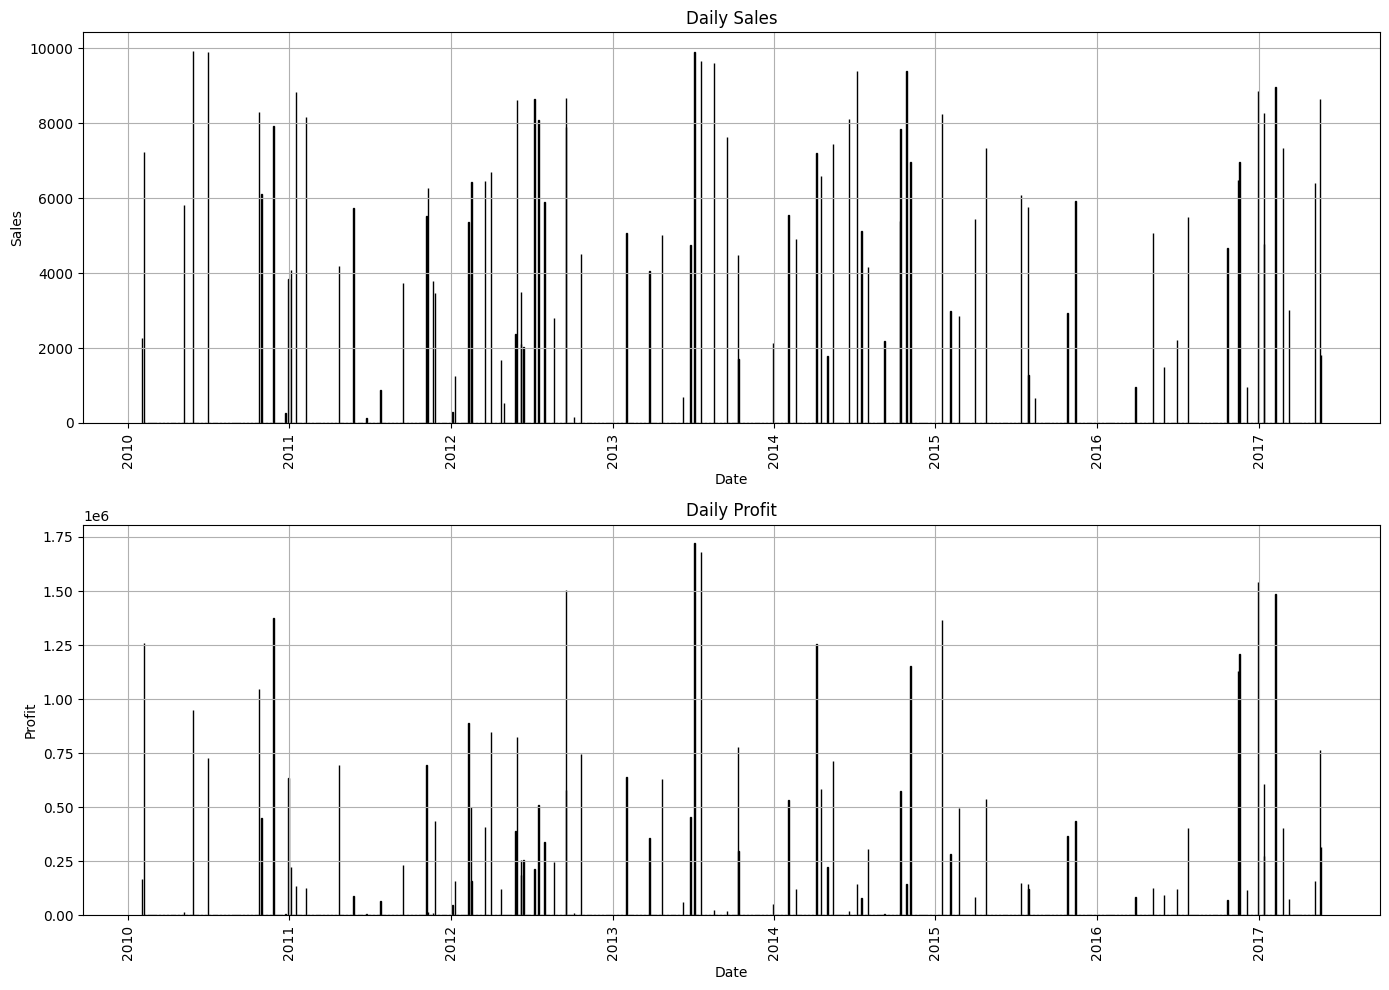

In [24]:
# Plot bar plots for daily sales and daily profit
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Bar plot for daily sales
ax1.bar(daily_sales.index, daily_sales['Units_Sold'], color='blue', edgecolor='black')
ax1.set_title('Daily Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=90)

# Bar plot for daily profit
ax2.bar(daily_sales.index, daily_sales['Total_Profit'], color='green', edgecolor='black')
ax2.set_title('Daily Profit')
ax2.set_xlabel('Date')
ax2.set_ylabel('Profit')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
df.Item_Type.nunique()

12

In [26]:
df.Item_Type.unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [27]:
salesBy_ItemType = df[['Order_Date','Units_Sold','Item_Type']].copy()
salesBy_ItemType

,Order_Date,Units_Sold,Item_Type
0,5/28/2010,9925,Baby Food
1,8/22/2012,2804,Cereal
2,5/2/2014,1779,Office Supplies
3,6/20/2014,8102,Fruits
4,2/1/2013,5062,Office Supplies
...,...,...,...
95,7/26/2011,888,Clothes
96,11/11/2011,6267,Fruits
97,6/1/2016,1485,Vegetables
98,7/30/2015,5767,Personal Care


### Sales by product of different Categories

In [28]:
#data col is formatted as datetime
salesBy_ItemType['Order_Date'] = pd.to_datetime(salesBy_ItemType['Order_Date'])

In [29]:
salesBy_ItemType = salesBy_ItemType.groupby('Item_Type')['Units_Sold'].sum()

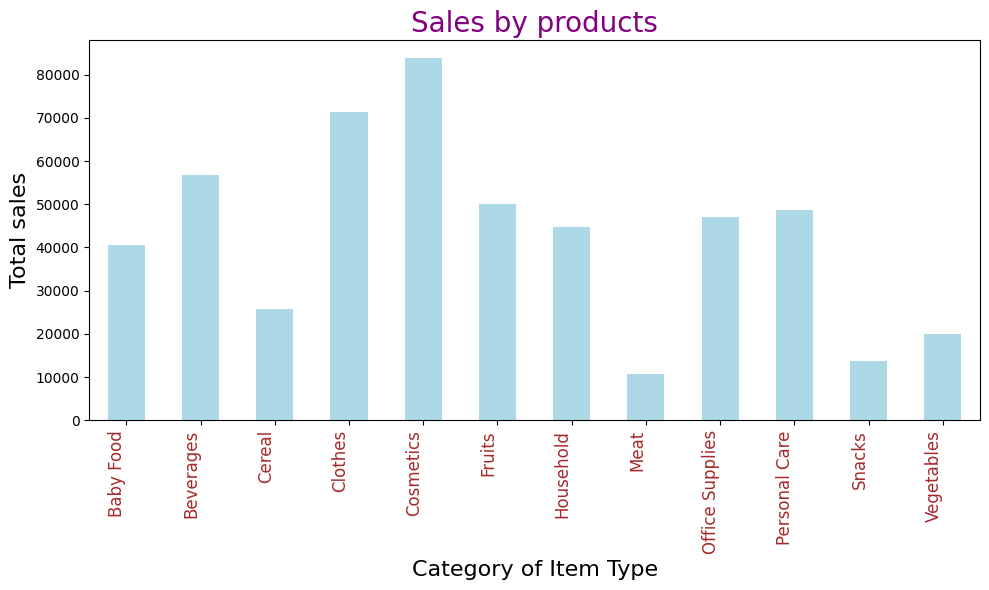

In [30]:
plt.figure(figsize=(10, 6))
bar = salesBy_ItemType.plot(kind='bar', color='lightblue')
plt.title('Sales by products',fontsize=20,color='purple')
plt.xlabel('Category of Item Type',fontsize=16)
plt.ylabel('Total sales',fontsize=16)
plt.xticks(rotation=90, ha='right',fontsize=12, color='Brown')
plt.tight_layout()
plt.show()

In [31]:
df.columns

Index(['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority',
       'Order_Date', 'Order_ID', 'Ship_Date', 'Units_Sold', 'Unit_Price',
       'Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit'],
      dtype='object')

### summary statistics for key metrics such as revenue and quantity sold

In [32]:
#calculate revenue for each sale
df['Total_Revenue'] = df['Units_Sold'] * df['Total_Profit']

In [33]:
#statistics for key metrics
Stats = df.agg({
    'Units_Sold' : ['mean','median','min','max','std'],
    'Total_Revenue' : ['mean','median','min','max','std']
})
Stats

,Units_Sold,Total_Revenue
mean,5128.710000,2.950190e+09
median,5382.500000,1.248266e+09
min,124.000000,6.566864e+05
max,9925.000000,1.701347e+10
std,2794.484562,3.873473e+09


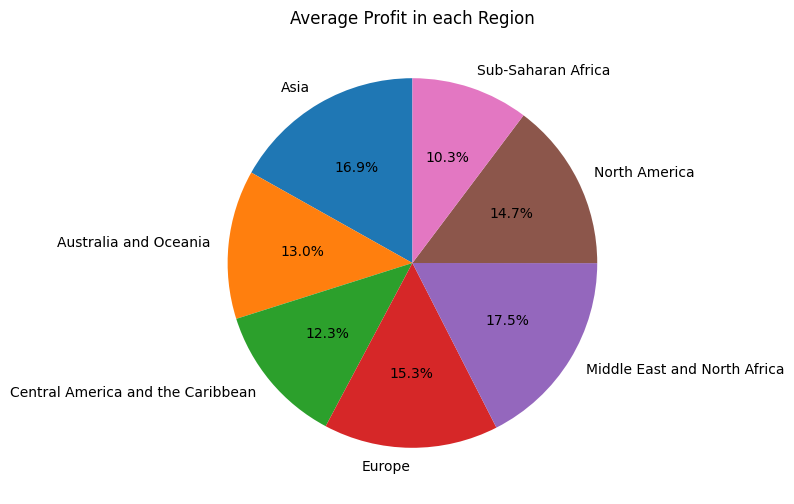

In [41]:
# Pie chart of Total Profit in region wise
plt.figure(figsize=(6, 6))

region_TotalRevenue = df.groupby('Region')['Total_Profit'].mean()
plt.pie(region_TotalRevenue, startangle=90, labels=region_TotalRevenue.index, autopct='%1.1f%%')

plt.title('Average Profit in each Region')
plt.show()  # Add this line to display the plot

In [34]:
corr = df[['Region', 'Country', 'Item_Type', 'Sales_Channel', 'Order_Priority',
       'Order_Date', 'Order_ID', 'Ship_Date', 'Units_Sold', 'Unit_Price',
       'Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit']].copy()
corr.describe()

,Order_ID,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,2.950190e+09,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,3.873473e+09,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,6.566864e+05,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,3.232941e+08,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,1.248266e+09,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,3.877794e+09,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,1.701347e+10,4.509794e+06,1.719922e+06


In [35]:
# getting variables that only have numerical values
df2 = Cleaned_data.convert_dtypes().select_dtypes("number")
df2

,Order_ID,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,669165933,9925,255.28,159.42,2533654.0,1582243.5,951410.5
1,963881480,2804,205.7,117.11,576782.8,328376.44,248406.36
2,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82
4,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.5
...,...,...,...,...,...,...,...
95,512878119,888,109.28,35.84,97040.64,31825.92,65214.72
96,810711038,6267,9.33,6.92,58471.11,43367.64,15103.47
97,728815257,1485,154.06,90.93,228779.1,135031.05,93748.05
98,559427106,5767,81.73,56.67,471336.91,326815.89,144521.02


In [36]:
corr_data = df2[df2.columns[1:]].corr()
corr_data

,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
Units_Sold,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit_Price,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit_Cost,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total_Revenue,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total_Cost,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total_Profit,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


<Axes: >

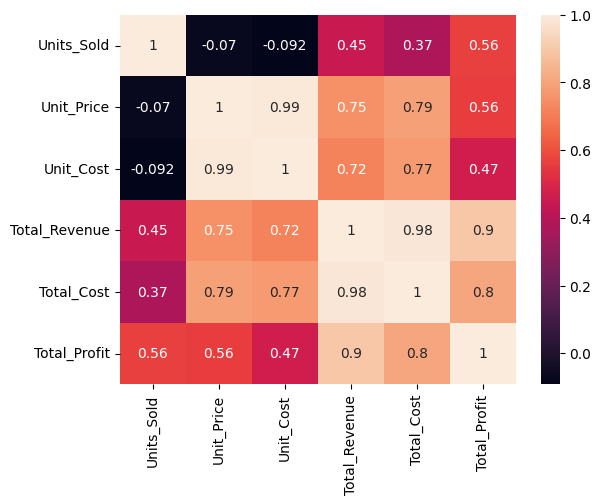

In [37]:
sns.heatmap(corr_data, annot=True)